# Decision tree
Goal of the excercise is to code selected part of the Decision tree algorithm which is focused on the optimum split part using gini index. After that the scikit-learn implementation of the Decision tree will be used.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the iris.csv dataset
- Take a look at the rows
- Label is the *species* column - how many unique labels do we have and how distributed?

In [2]:
df = pd.read_csv("../data/iris.csv")

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

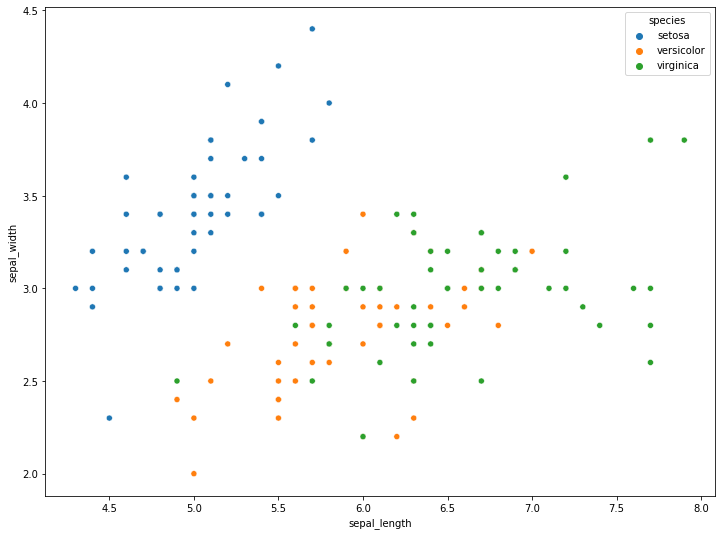

In [3]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='sepal_length', y='sepal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

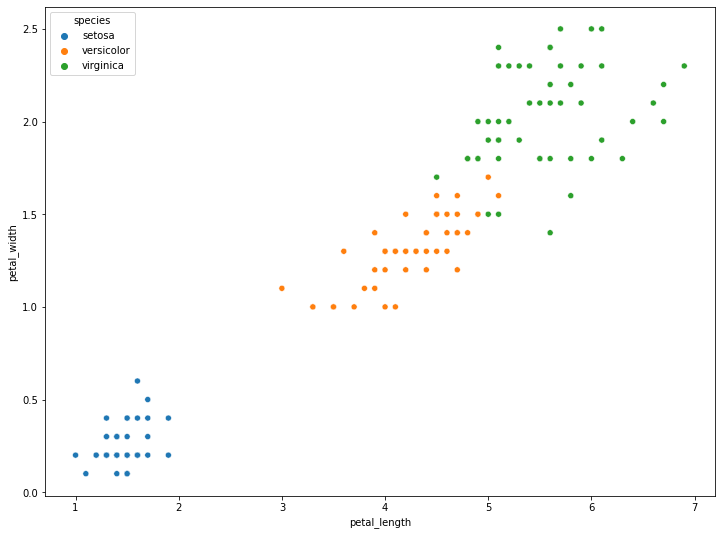

In [4]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')

### Compute the gini index for the whole data set
- Take a look at the slides on my Homel for the formulas and examples
- What is the minimum and maximum value for 2 classes? And for three?
- What result should we expect for the whole data set?

- Compute probability for every label in *species* attribute in the *data* parameter and use it in the Gini index formula

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.species.value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
def gini_index(data: pd.DataFrame):
    res = 0
    for sp in data.species.unique():
        res+= pow(data.loc[data.species == sp].shape[0] / data.shape[0], 2)
    return 1 - res  
    pass

In [8]:
gini_index(df)

0.6666666666666667

### Take only the *sepal_width* attribute
- Try to split the by attribute by value 3.35 (<= 3.35)
- Compute the gini index for the left and the right side of the split
    - Left: 0.629
    - Right: 0.285
- Compute the total gini impurity for this split
    - Total: 0.546
    
**How to solve the example?**
$$
Gini(left) = 1 - \left[ \left(\frac{45}{114}\right)^2 + \left(\frac{49}{114}\right)^2 + \left(\frac{20}{114}\right)^2 \right] = 0.629
$$

$$
Gini(right) = 1 - \left[ \left(\frac{5}{36}\right)^2 + \left(\frac{1}{36}\right)^2 + \left(\frac{30}{36}\right)^2 \right] = 0.285
$$

$$
GiniImpurity = \frac{|df_{left}|}{|df|} * Gini(left) + \frac{|df_{right}|}{|df|} * Gini(right) =  \frac{114}{150} * 0.629 + \frac{36}{150} * 0.285 = 0.546
$$


In [9]:
df_left = df[df.sepal_width <= 3.35]
df_left.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
df_left.species.value_counts()

versicolor    49
virginica     45
setosa        20
Name: species, dtype: int64

In [11]:
gini_index(df_left)

0.6286549707602339

In [12]:
df_right = df[df.sepal_width > 3.35]
df_right.species.value_counts()

setosa        30
virginica      5
versicolor     1
Name: species, dtype: int64

In [13]:
gini_index(df_right)

0.28549382716049376

In [14]:
# gini_inpurity = df_left.shape[0] / df.shape[0] * gini_index(
#     df_left) + df_right.shape[0] / df.shape[0] * gini_index(df_right)
# gini_inpurity
def gini_inpurity(df_left: pd.DataFrame, df_right: pd.DataFrame):
    inpurity = df_left.shape[0] / df.shape[0] * gini_index(
        df_left) + df_right.shape[0] / df.shape[0] * gini_index(df_right)
    return inpurity

## Repeat the process for the all 4 attributes and find the best split and gini impurity for all of them
- You will try all the possible boundaries along all the features, i.e. all the axes petal width and sepal width.
    - How to set the boundary? 
        - Select only the unique values of the chosen attribute (.unique() function)
        - Sort the values (np.sort())
        - Iterate over the array of the values, take every two consecutive numbers and compute their mean
        - The mean is the current split boundary
- For each split the algorithm will compute the Gini impurity of the two groups created.
- Finally you will choose the decision boundary (best split) that gives the lowest Gini impurity for the two groups from all the 4 attbibutes

### Results:
- index = 0, Sepal Length < 5.45, Gini = 0.44
- index = 1, Sepal Width < 3.35, Gini = 0.54
- index = 2, Petal Length < 2.45, Gini = 0.33
- index = 3, Petal Width < 0.80, Gini = 0.33

- **Selected split:** index = 2, Petal Length < 2.45, Gini = 0.33 (... or index = 3, Petal Width < 0.80, Gini = 0.33)

## If we have only this one split - how will the classification rule-set look like?

In [15]:
def print_splits(df: pd.DataFrame, column: str):
    arr = np.sort(df[column].unique())
    best_inpurity = None
    for idx in range(arr.size - 2):
        split = np.mean(arr[idx] + arr[idx+1] / 2)
        df_left = df.loc[df[column] <= split]
        df_right = df.loc[df[column] > split]
        inpurity = gini_inpurity(df_left, df_right)
        if(best_inpurity == None or inpurity < best_inpurity):
            best_inpurity = inpurity
    return best_inpurity


In [40]:
best_sepal_length = print_splits(df, 'sepal_length')
best_petal_length = print_splits(df, 'petal_length')

best_sepal_length, best_petal_length

df_r = df.loc[df.petal_length > best_petal_length]
df_l = df.loc[df.petal_length <= best_petal_length]

sepal_length  sepal_width  petal_length  petal_width  species   
4.9           3.1          1.5           0.1          setosa        3
5.8           2.7          5.1           1.9          virginica     2
              4.0          1.2           0.2          setosa        1
5.9           3.0          4.2           1.5          versicolor    1
6.2           3.4          5.4           2.3          virginica     1
                                                                   ..
5.5           2.3          4.0           1.3          versicolor    1
              2.4          3.7           1.0          versicolor    1
                           3.8           1.1          versicolor    1
              2.5          4.0           1.3          versicolor    1
7.9           3.8          6.4           2.0          virginica     1
Length: 147, dtype: int64

## sepal_length

In [17]:
print_splits(df, 'sepal_length')

0.5909445745511319

## sepal_width

In [18]:
print_splits(df, 'sepal_width')

0.5462962962962963

## petal_length

In [19]:
print_splits(df, 'petal_length')

0.3333333333333333

## petal_width

In [20]:
print_splits(df, 'petal_width')

0.3333333333333333

## Split the data using the selected split criterion (note: use the one using petal_length)
### Repeat the whole process one more time for the part of the data with more than 1 class
### Find the best split again
### Draw the decision tree with the two defined levels you have created this way - you can use any graphic editor you like, even the MS Paint :-)

In [21]:
# Your code

# Introduction to the scikit-learn (Sklearn) library
Open source library for predictive data analysis. Contains algorithms for classification, clustering and others.

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Let's start with splitting the data into the input and output part
- Usually named as a *X* and *y* variables

In [23]:
X = df.loc[:, ['sepal_length', 'sepal_width',
               'petal_length', 'petal_width']]
y = df.species


In [24]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## What is the size of our data?

In [26]:
X.shape

(150, 4)

## There is a good practice to do evaluation process for every classification or regressions task.
- Do you know how to evaluate models?
- Do you know train test split method for evaluation? Do you know any different split method? How is it used?
- Do you know any different evaluation process?

## Lets continue with train test split process. Split dataset to train:test ratio 60:40. Check how many records/rows do you have in splitted variables.
- Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=30)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((90, 4), (60, 4), (90,), (60,))

## Take a look on data in variable y_test 
- Can you detect how many elements of each class is represented in test split?

In [28]:
y_test

20         setosa
5          setosa
3          setosa
101     virginica
82     versicolor
80     versicolor
123     virginica
145     virginica
74     versicolor
107     virginica
38         setosa
103     virginica
93     versicolor
99     versicolor
8          setosa
97     versicolor
32         setosa
1          setosa
24         setosa
72     versicolor
133     virginica
42         setosa
0          setosa
35         setosa
105     virginica
132     virginica
70     versicolor
136     virginica
2          setosa
87     versicolor
139     virginica
81     versicolor
112     virginica
127     virginica
118     virginica
141     virginica
98     versicolor
137     virginica
71     versicolor
129     virginica
143     virginica
128     virginica
14         setosa
68     versicolor
111     virginica
59     versicolor
94     versicolor
73     versicolor
89     versicolor
88     versicolor
6          setosa
67     versicolor
144     virginica
92     versicolor
21         setosa
83     ver

In [29]:
y_test.value_counts()

versicolor    24
virginica     20
setosa        16
Name: species, dtype: int64

## Create the Decision tree classifier instance

In [30]:
clf = DecisionTreeClassifier()

### Use *fit()* method for training of classifier

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Lets use trained model for the prediction part
- Get predictions via the method *predict()*

In [32]:
y_pred = clf.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

### Can we evaluate our model? How good is it? What does accuracy mean?

In [33]:
accuracy_score(y_test, y_pred)

0.95

# Task (2b)
- Finish the implementation task from the exercise 